In [ ]:
!pip install joypy

In [ ]:
## Data Manipulation
import numpy as np
import pandas as pd
import sqlite3
import pickle

## Authorization
from google.colab import auth
from google.colab import drive
from oauth2client.client import GoogleCredentials
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive

## Plotting
import plotly.express as px
import plotly.graph_objects as go
from joypy import joyplot
import matplotlib.pyplot as plt
import folium
import seaborn as sns
from collections import Counter


## Machine Learning
from sklearn import preprocessing




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from joypy import joyplot
import folium
from collections import Counter

from sklearn import preprocessing


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Projects/FirePrediction/data.csv', index_col=0)
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Projects/FirePrediction/data.csv'

In [ ]:
# Some preparation for visualization: drop all the null columns and unrelated columns
new_df = df.drop(columns=["FOD_ID", "NWCG_REPORTING_UNIT_ID", "NWCG_REPORTING_UNIT_NAME",
             "SOURCE_REPORTING_UNIT", "SOURCE_REPORTING_UNIT_NAME", "LOCAL_FIRE_REPORT_ID", "LOCAL_INCIDENT_ID",
             "FIRE_CODE", "FIRE_NAME", "ICS_209_INCIDENT_NUMBER", "ICS_209_NAME", "MTBS_ID", "MTBS_FIRE_NAME",
             "COMPLEX_NAME", "OWNER_CODE", "COUNTY", "FIPS_CODE", "FIPS_NAME", "Shape", "FPA_ID"])
new_df['DATE'] = pd.to_datetime(new_df['DISCOVERY_DATE'] - pd.Timestamp(0).to_julian_date(), unit='D')
new_df['MONTH'] = pd.DatetimeIndex(new_df['DATE']).month
new_df['DAY_OF_WEEK'] = pd.DatetimeIndex(new_df['DATE']).dayofweek
new_df['CONT_DATE'] = pd.to_datetime(new_df['CONT_DATE'] - pd.Timestamp(0).to_julian_date(), unit='D')
new_df['CONT_MONTH'] = pd.DatetimeIndex(new_df['CONT_DATE']).month
new_df['CONT_DAY_OF_WEEK'] = pd.DatetimeIndex(new_df['CONT_DATE']).dayofweek
new_df["BURNING_DURATION_PER_DAY"] = (new_df["CONT_DATE"] - new_df["DATE"]).dt.days
new_df = new_df.drop(columns=["DISCOVERY_DATE", "DISCOVERY_DOY", "CONT_DATE", "CONT_DOY", "DATE", "DISCOVERY_TIME", "CONT_TIME"])
new_df["FIRE_SIZE"] = np.log(1 + (new_df["FIRE_SIZE"]))
le = preprocessing.LabelEncoder()
new_df["FIRE_SIZE_CLASS"] = le.fit_transform(new_df["FIRE_SIZE_CLASS"])
cause_code_map = {
  'Lightning': 1,
  'Equipment Use': 2,
  'Fireworks': 3,
  'Powerline': 4,
  'Railroad': 5,
  'Smoking': 6,
  'Structure': 7,
  'Debris Burning': 8,
  'Miscellaneous': 9,
  'Arson' : 10,
  'Campfire': 11,
  'Children': 12
}
#create STAT_CAUSE_CODE
new_df['STAT_CAUSE_CODE'] = new_df['STAT_CAUSE_DESCR'].map(cause_code_map)
vis_df = new_df.copy()
vis_df['STAT_CAUSE_CODE'] = vis_df['STAT_CAUSE_CODE'].astype(int)




# STAT_CAUSE_DESCR

We know that our target column is STAT_CAUSE_DESCR, so let's look at the distribution of the labels.

---

We can see that the labels are not very balanced, so we might need to think of a way to balance the data later.  

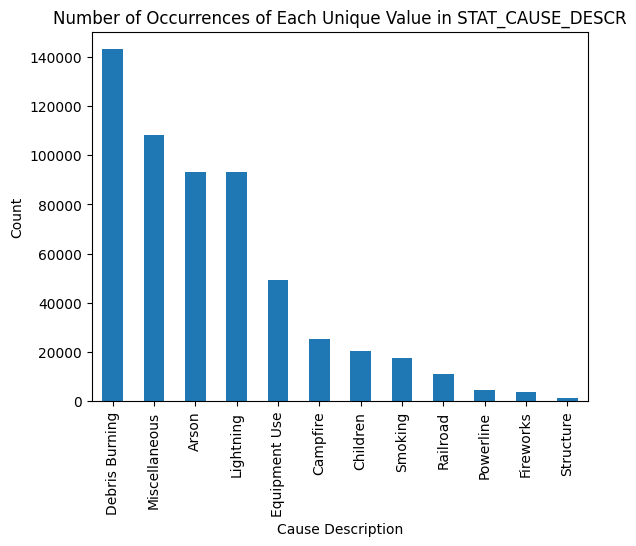

In [ ]:
df['STAT_CAUSE_DESCR'].value_counts().plot(kind='bar')

# Add labels and title
plt.title('Number of Occurrences of Each Unique Value in STAT_CAUSE_DESCR')
plt.xlabel('Cause Description')
plt.ylabel('Count')

# Show the plot
plt.show()

# Null value

In [ ]:
column_stats = []
for column_name in df.columns:
    column = df[column_name]
    num_null = column.isnull().sum()
    total_values = len(column)
    null_percent = (num_null / total_values) * 100
    num_of_unique_values = len(column.unique())
    column_stats.append((column_name, num_null, null_percent,num_of_unique_values))

column_stats_df = pd.DataFrame(column_stats, columns=['ColumnName', 'NullNumber', 'NullPercentage', "UniqueValueNumber"])
column_stats_df

,ColumnName,NullNumber,NullPercentage,UniqueValueNumber
0,OBJECTID,0,0.000000,571425
1,FOD_ID,0,0.000000,571425
2,FPA_ID,0,0.000000,571425
3,SOURCE_SYSTEM_TYPE,0,0.000000,3
4,SOURCE_SYSTEM,0,0.000000,32
5,NWCG_REPORTING_AGENCY,0,0.000000,10
6,NWCG_REPORTING_UNIT_ID,0,0.000000,1345
7,NWCG_REPORTING_UNIT_NAME,0,0.000000,1341
8,SOURCE_REPORTING_UNIT,0,0.000000,4124
9,SOURCE_REPORTING_UNIT_NAME,0,0.000000,3611


In [ ]:
null_columns = ['LOCAL_FIRE_REPORT_ID', 'LOCAL_INCIDENT_ID', 'FIRE_CODE', 'FIRE_NAME', 'ICS_209_INCIDENT_NUMBER',  'ICS_209_NAME',
                'MTBS_ID', 'MTBS_FIRE_NAME', 'COMPLEX_NAME', 'DISCOVERY_TIME', 'CONT_DATE', 'CONT_DOY', 'CONT_TIME',
                'COUNTY', 'FIPS_CODE', 'FIPS_NAME']

In [ ]:
label_distribution_pd_series = []
target_column = 'STAT_CAUSE_DESCR'
for feature_column in null_columns:
  # Filter rows where the specified feature is null
  missing_feature_df = df[df[feature_column].isnull()]
  # Get the distribution of target labels for rows where the feature is null
  label_distribution = missing_feature_df[target_column].value_counts(normalize=True)
  label_distribution.name = feature_column
  label_distribution_pd_series.append(label_distribution)
value_count_label_distribution_df = pd.concat(label_distribution_pd_series, axis=1)

label_distribution_pd_series = []
target_column = 'STAT_CAUSE_DESCR'
for feature_column in null_columns:
  # Filter rows where the specified feature is null
  missing_feature_df = df[~df[feature_column].isnull()]
  # Get the distribution of target labels for rows where the feature is null
  label_distribution = missing_feature_df[target_column].value_counts(normalize=True)
  label_distribution.name = feature_column
  label_distribution_pd_series.append(label_distribution)
value_count_not_null_label_distribution_df = pd.concat(label_distribution_pd_series, axis=1)


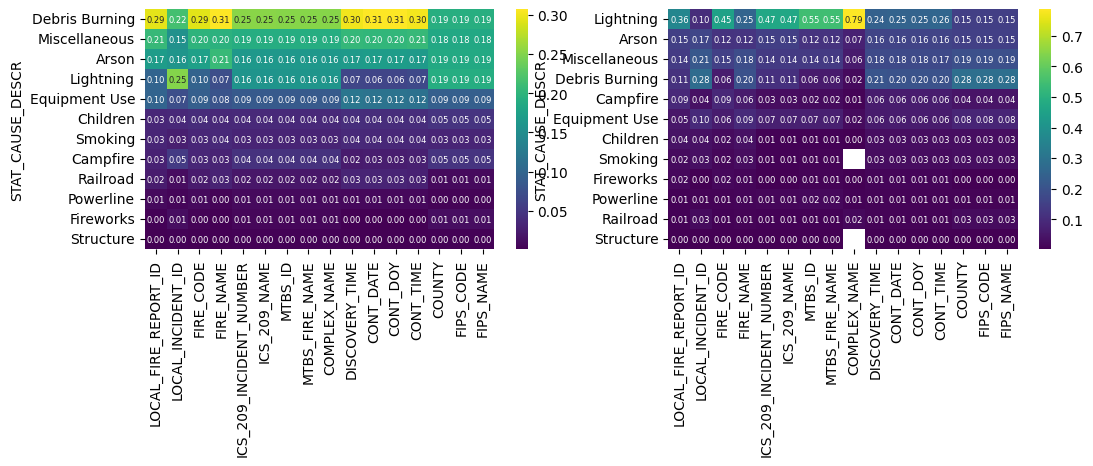

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))

# plot two plots
sns.heatmap(value_count_label_distribution_df, annot=True, cmap='viridis', fmt='.2f', annot_kws={"fontsize":6}, ax=ax[0])
sns.heatmap(value_count_not_null_label_distribution_df, annot=True, cmap='viridis', fmt='.2f', annot_kws={"fontsize":6}, ax=ax[1])

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

In [ ]:
percentage_of_each_label = df[target_column].value_counts(normalize=True)
percentage_of_each_label

STAT_CAUSE_DESCR
Debris Burning    0.250381
Miscellaneous     0.189652
Arson             0.163283
Lightning         0.162851
Equipment Use     0.086491
Campfire          0.044393
Children          0.035620
Smoking           0.030749
Railroad          0.019343
Powerline         0.008283
Fireworks         0.006764
Structure         0.002191
Name: proportion, dtype: float64

In [ ]:
diff_value_count_label_distribution_df = value_count_label_distribution_df.copy()
diff_value_count_not_null_label_distribution_df = value_count_not_null_label_distribution_df.copy()


diff_value_count_label_distribution_df = diff_value_count_label_distribution_df.div(percentage_of_each_label, axis=0)
diff_value_count_not_null_label_distribution_df = diff_value_count_not_null_label_distribution_df.div(percentage_of_each_label, axis=0)

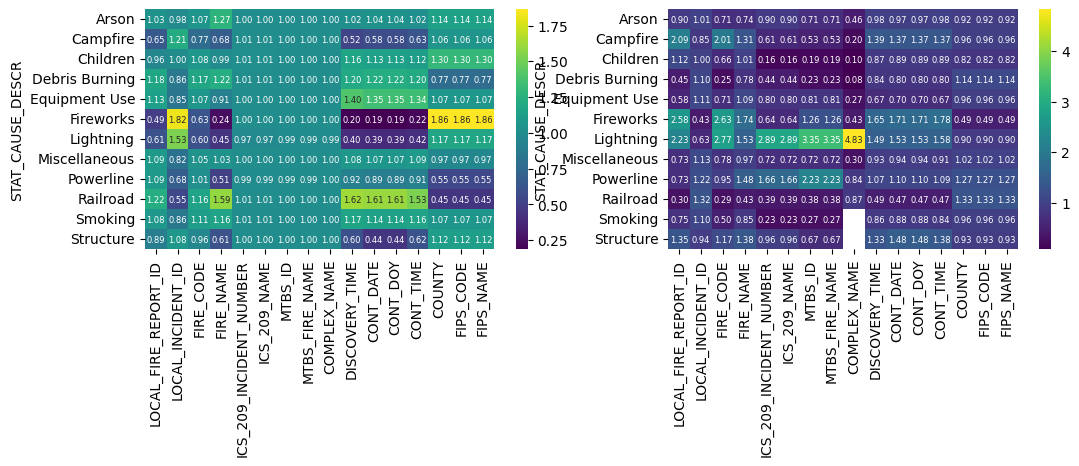

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))

# plot two plots
sns.heatmap(diff_value_count_label_distribution_df, annot=True, cmap='viridis', fmt='.2f', annot_kws={"fontsize":6}, ax=ax[0])
sns.heatmap(diff_value_count_not_null_label_distribution_df, annot=True, cmap='viridis', fmt='.2f', annot_kws={"fontsize":6}, ax=ax[1])

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)


Let's see if the nulls are related

<Axes: >

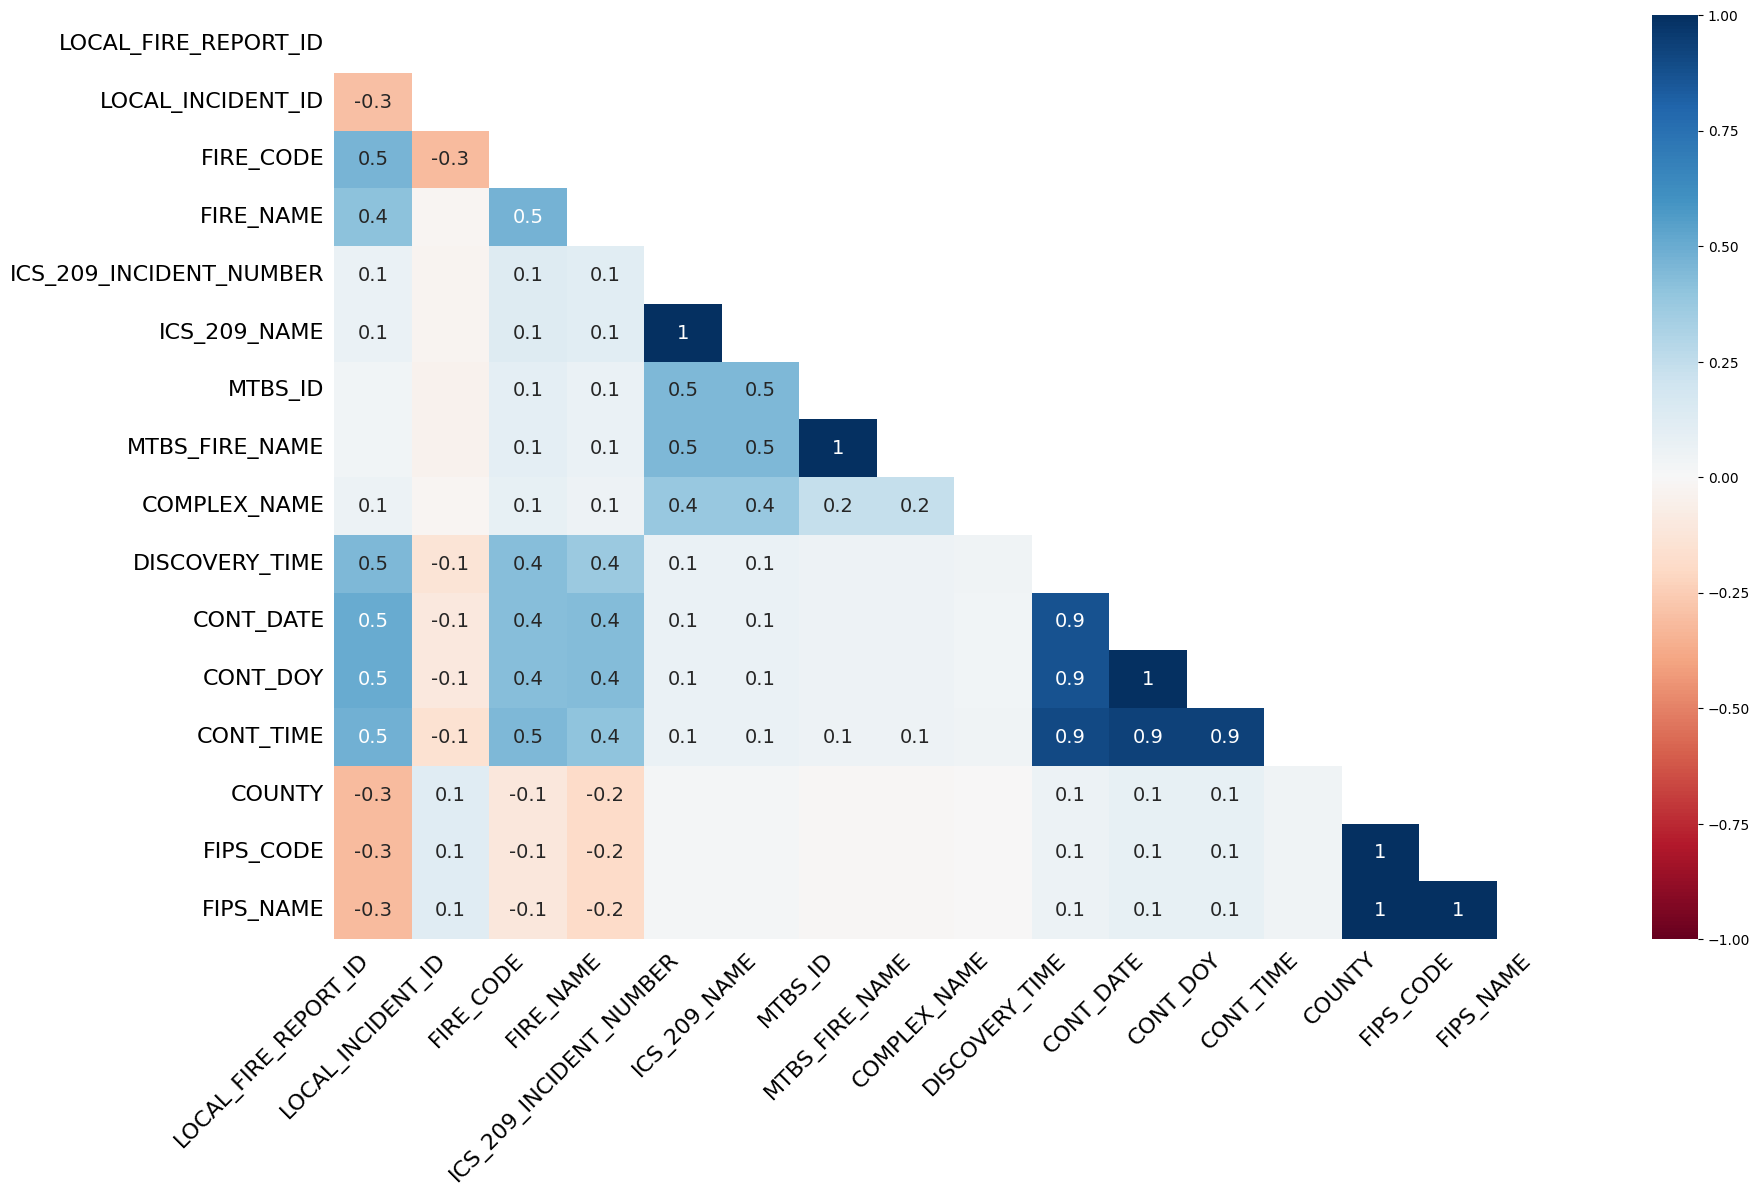

In [ ]:
import missingno as msno
msno.heatmap(df)

# Geospacial Data

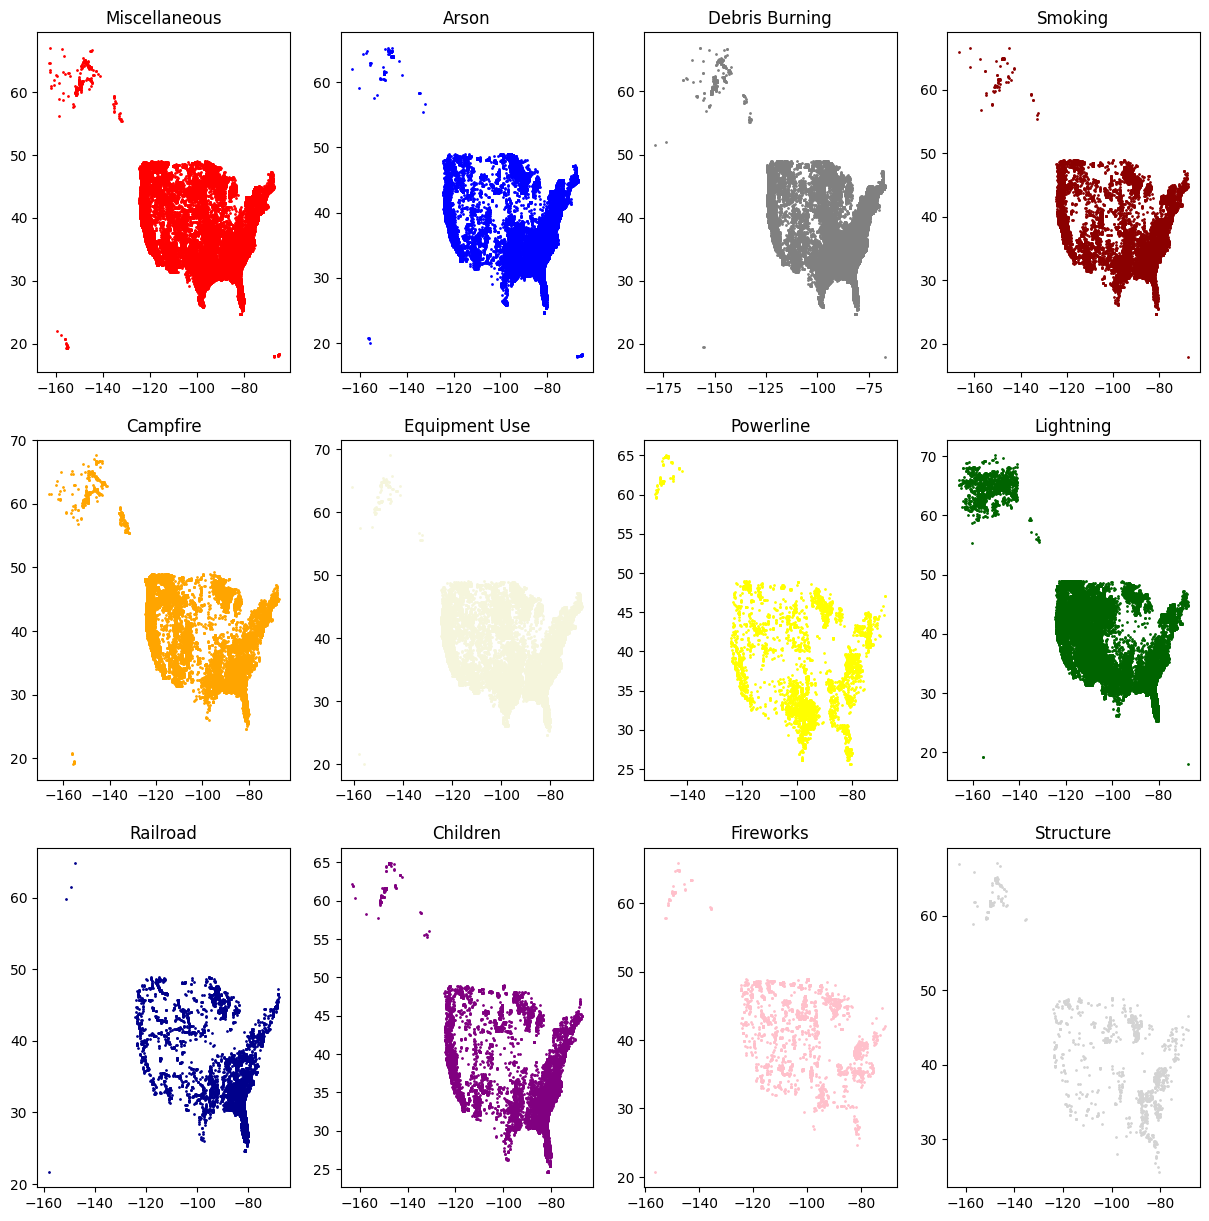

In [ ]:
# We give color for each cause to see each cause on a map
colors = [
    'red',
    'blue',
    'gray',
    'darkred',
    'orange',
    'beige',
    'yellow',
    'darkgreen',
    'darkblue',
    'purple',
    'pink',
    'lightgray',
    'green',
    'black'
]
causes = vis_df['STAT_CAUSE_DESCR'].unique()
colors_cause_dic = {causes[i]: colors[i] for i in range(len(causes))}
fig, ax = plt.subplots(3, 4, figsize=(15, 15))


for i, cause in enumerate(colors_cause_dic.keys()):
  row = i//4
  col = i%4
  ax[row, col].scatter(x=vis_df[vis_df['STAT_CAUSE_DESCR'] == cause]['LONGITUDE'],
             y=vis_df[vis_df['STAT_CAUSE_DESCR'] == cause]['LATITUDE'],
             c=colors_cause_dic[cause], label=cause, s=1)
  ax[row, col].set_title(cause)
plt.show()

In [ ]:
import folium
import pandas as pd
from folium.plugins import HeatMap



# Create a folium map centered around the mean of latitude and longitude
m = folium.Map(location=[df['LATITUDE'].mean(), df['LONGITUDE'].mean()], zoom_start=4)

# Filter the DataFrame for a specific class
class_to_visualize = 'Arson'
filtered_df = df[df['STAT_CAUSE_DESCR'] == class_to_visualize]

# Convert the DataFrame to a list of tuples (latitude, longitude)
heat_data = [[row['LATITUDE'], row['LONGITUDE']] for index, row in filtered_df.iterrows()]

# Add the HeatMap layer to the map
HeatMap(heat_data).add_to(m)

# # Display the map
# m


We can't really see a very clear distinction here. But alaska certainly have more lightening.  
And I am not so sure but seems like Debris Buring is a bit correlated to Campfire in terms of location.  
Something we could have done, is Do feature engineering for distance to some landmarks. What are the landmarks? The center of some clusters?  
ALso, campfire is more densed at alaska too.  
And rail road are less dense in alaska.  
There are more....

In [ ]:
# Let's see how to create a classifier that can split this graph by area.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
X = new_df[['LONGITUDE', 'LATITUDE']]
y = new_df['STAT_CAUSE_CODE']
# Training a decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X, y)


DecisionTreeClassifier()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


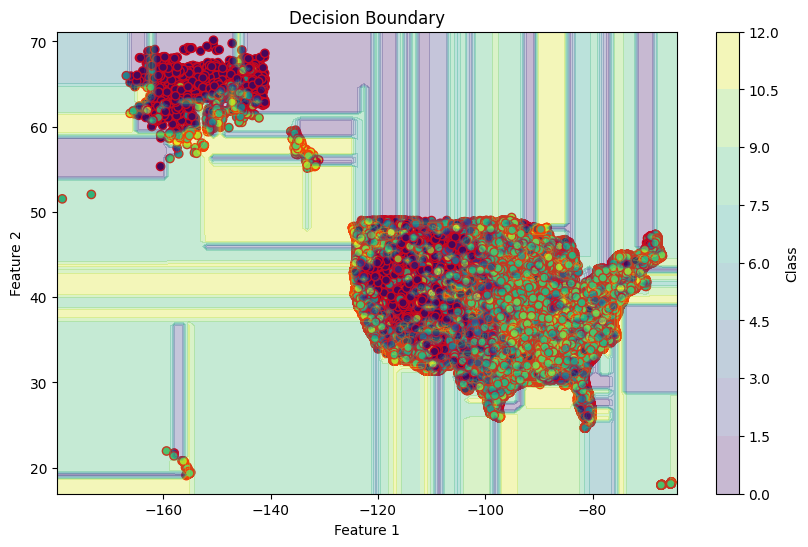

In [ ]:
# Plotting decision boundary
plt.figure(figsize=(10, 6))

# Plotting data points
plt.scatter(X['LONGITUDE'], X['LATITUDE'], c=y, cmap='viridis', marker='o', edgecolors='r')

# Creating meshgrid for decision boundary
xx, yy = np.meshgrid(np.linspace(X['LONGITUDE'].min() - 1, X['LONGITUDE'].max() + 1, 100),
                     np.linspace(X['LATITUDE'].min() - 1, X['LATITUDE'].max() + 1, 100))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Plotting decision boundary
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')

# Adding labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary')

# Showing the plot
plt.colorbar(label='Class')
plt.show()

## State

In [ ]:
# Count of Fire Causes by State:
def cause_by_state_count(df):
    cause_state_count = df.groupby(by = ['STATE', 'STAT_CAUSE_CODE'])['OBJECTID'].count()
    class_list = {'1':cause_state_count.loc[:,1],
                  '2':cause_state_count.loc[:,2],
                  '3':cause_state_count.loc[:,3],
                  '4':cause_state_count.loc[:,4],
                  '5':cause_state_count.loc[:,5],
                  '6':cause_state_count.loc[:,6],
                  '7':cause_state_count.loc[:,7],
                  '8':cause_state_count.loc[:,8],
                  '9':cause_state_count.loc[:,9],
                  '10':cause_state_count.loc[:,10],
                  '11':cause_state_count.loc[:,11],
                  '12':cause_state_count.loc[:,12],
                  'TOTAL':cause_state_count.groupby('STATE').sum()
    }
    return pd.DataFrame(class_list)

cause_state_count = cause_by_state_count(vis_df)
fig = go.Figure(data=[
    go.Bar(name = 'Lightning',x = cause_state_count.index,
          y = cause_state_count['1']),
    go.Bar(name = 'Equipment Use',x = cause_state_count.index,
          y = cause_state_count['2']),
    go.Bar(name = 'Fireworks',x = cause_state_count.index,
           y = cause_state_count['3']),
    go.Bar(name = 'Powerline',x = cause_state_count.index,
           y = cause_state_count['4']),
    go.Bar(name = 'Railroad',x = cause_state_count.index,
           y = cause_state_count['5']),
    go.Bar(name = 'Smoking',x = cause_state_count.index,
           y = cause_state_count['6']),
    go.Bar(name = 'Structure',x = cause_state_count.index,
           y = cause_state_count['7']),
    go.Bar(name = 'Debris Burning',x = cause_state_count.index,
           y = cause_state_count['8']),
    go.Bar(name = 'Miscellaneous',x = cause_state_count.index,
           y = cause_state_count['9']),
    go.Bar(name = 'Arson',x = cause_state_count.index,
           y = cause_state_count['10']),
    go.Bar(name = 'Campfire',x = cause_state_count.index,
           y = cause_state_count['11']),
    go.Bar(name = 'Children',x = cause_state_count.index,
           y = cause_state_count['12'])
])

fig.update_layout(barmode='stack',
                  width=1200,
                  height=800,
                  title = 'Count of Fire Causes by State',
                  title_x = 0.5)
fig.update_xaxes(tickangle=90)
fig.show()

Need to see this by percentage....
Let's take a look at the

# Time

Text(0, 0.5, 'Count of Fires')

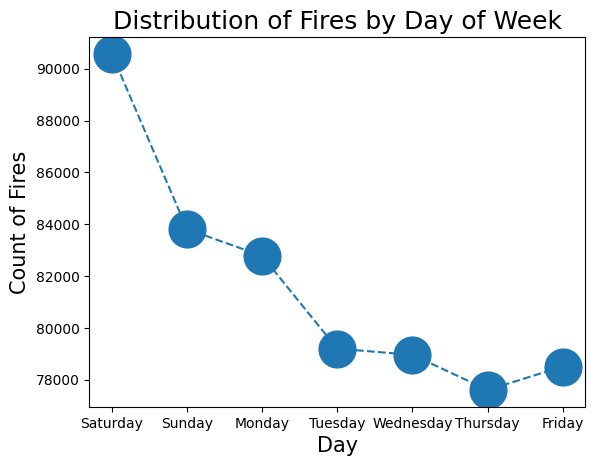

In [ ]:
# Number of Fires by Day of Week:
vis_df["DAY_OF_WEEK"] = vis_df["DAY_OF_WEEK"].apply(lambda x: {0 : "Monday", 1: "Tuesday", 2 : "Wednesday", 3 : "Thursday", 4: "Friday", 5: "Saturday", 6: "Sunday"}[x])
days = ["Saturday", "Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
day_of_week_freq = vis_df["DAY_OF_WEEK"].value_counts()
day_of_week_freq = pd.DataFrame([day_of_week_freq[day] for day in days], index = days)[0]
plt.scatter(day_of_week_freq.index, day_of_week_freq, s = 700)
day_of_week_freq.plot(linestyle='dashed')
plt.title('Distribution of Fires by Day of Week', fontsize=18)
plt.xlabel('Day', fontsize=15)
plt.ylabel('Count of Fires', fontsize=15)

<ipython-input-21-b69f653470c4>:15: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-21-b69f653470c4>:15: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-21-b69f653470c4>:15: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-21-b69f653470c4>:15: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-21-b69f653470c4>:15: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-21-b69f653470c4>:15: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-21-b69f653470c4>:15: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-21-b69f653470c4>:15: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-21-b69f653470c4>:15: UserWarning:

FixedFormatter should only be used together wi

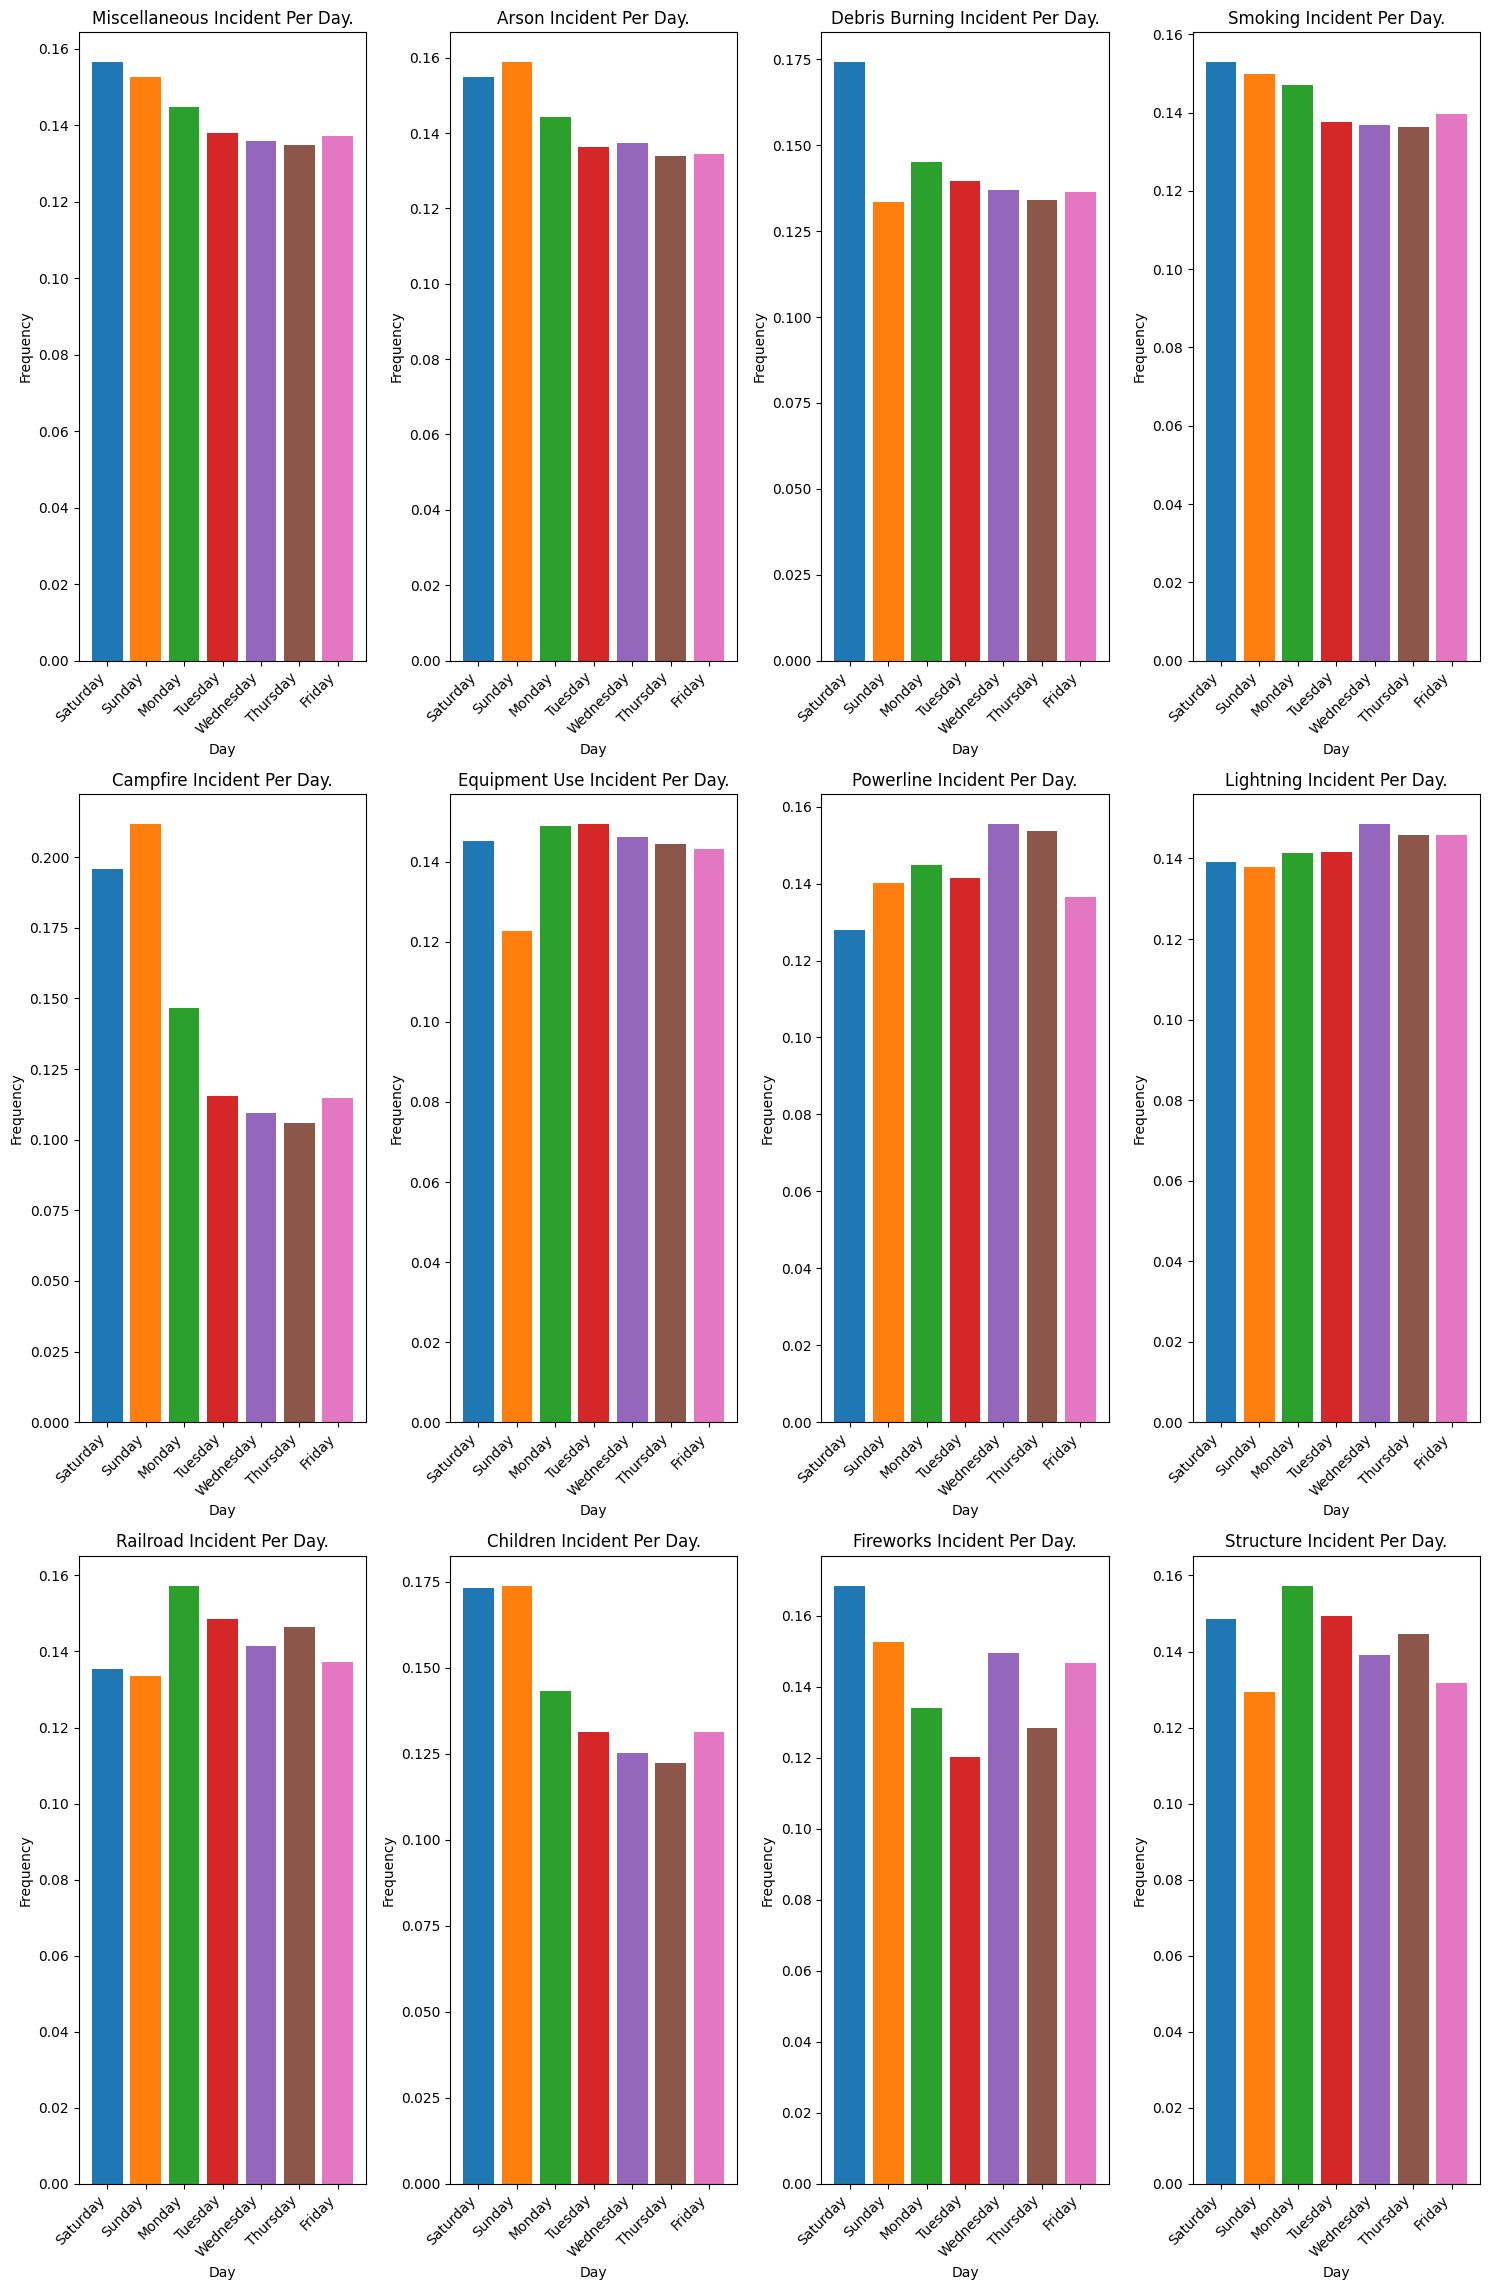

In [ ]:
# Correlation between day of the week and type of fire: Camp fire might be more often on weekends
fig, ax = plt.subplots(3, 4, figsize=(15, 23))
for i, cause in enumerate(vis_df["STAT_CAUSE_DESCR"].unique()):
  row = i//4
  col = i%4
  temp_df = vis_df[vis_df["STAT_CAUSE_DESCR"] == cause]
  our_data = temp_df["DAY_OF_WEEK"].value_counts()
  my_dic = dict(our_data/sum(our_data))

  for day in days:
    ax[row, col].bar(day, my_dic[day])

  ax[row, col].set_title(cause + " Incident Per Day.")
  ax[row, col].set_xlabel("Day")
  ax[row, col].set_xticklabels(days, rotation=45, ha='right')
  ax[row, col].set_ylabel("Frequency")

fig.tight_layout()
plt.show()

In [ ]:
# Number of Fires by Month:
vis_df["MONTH"] = vis_df["MONTH"].apply(lambda x: {1: "January", 2 : "February", 3 : "March",
                                                       4: "April", 5: "May", 6: "June", 7 : "July", 8 : "August", 9 : "September", 10: "October", 11 : "November", 12: "December"}[x])
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
month_freq = vis_df["MONTH"].value_counts()
month_freq = pd.DataFrame([month_freq[month] for month in months], index = months)[0]
plt.scatter(month_freq.index, month_freq, s = 700)
month_freq.plot(linestyle='dashed')
plt.title('Distribution of Fires by Month', fontsize=18)
plt.xlabel('Month', fontsize=15)
plt.ylabel('Count of Fires', fontsize=15)

NameError: name 'vis_df' is not defined

We can see that wildfire incidents are less common in Fall-Winter (September - February)

Where in Spring-Summer, there are increase in those incidents.

Also in this case we can assume that the increase is because of campfires or equipment use. Since on Summer, people tend to go on trips such as going to park or woods where equipments / materials are more flammable.

<ipython-input-23-8a0405e4b438>:15: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-23-8a0405e4b438>:15: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-23-8a0405e4b438>:15: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-23-8a0405e4b438>:15: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-23-8a0405e4b438>:15: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-23-8a0405e4b438>:15: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-23-8a0405e4b438>:15: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-23-8a0405e4b438>:15: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-23-8a0405e4b438>:15: UserWarning:

FixedFormatter should only be used together wi

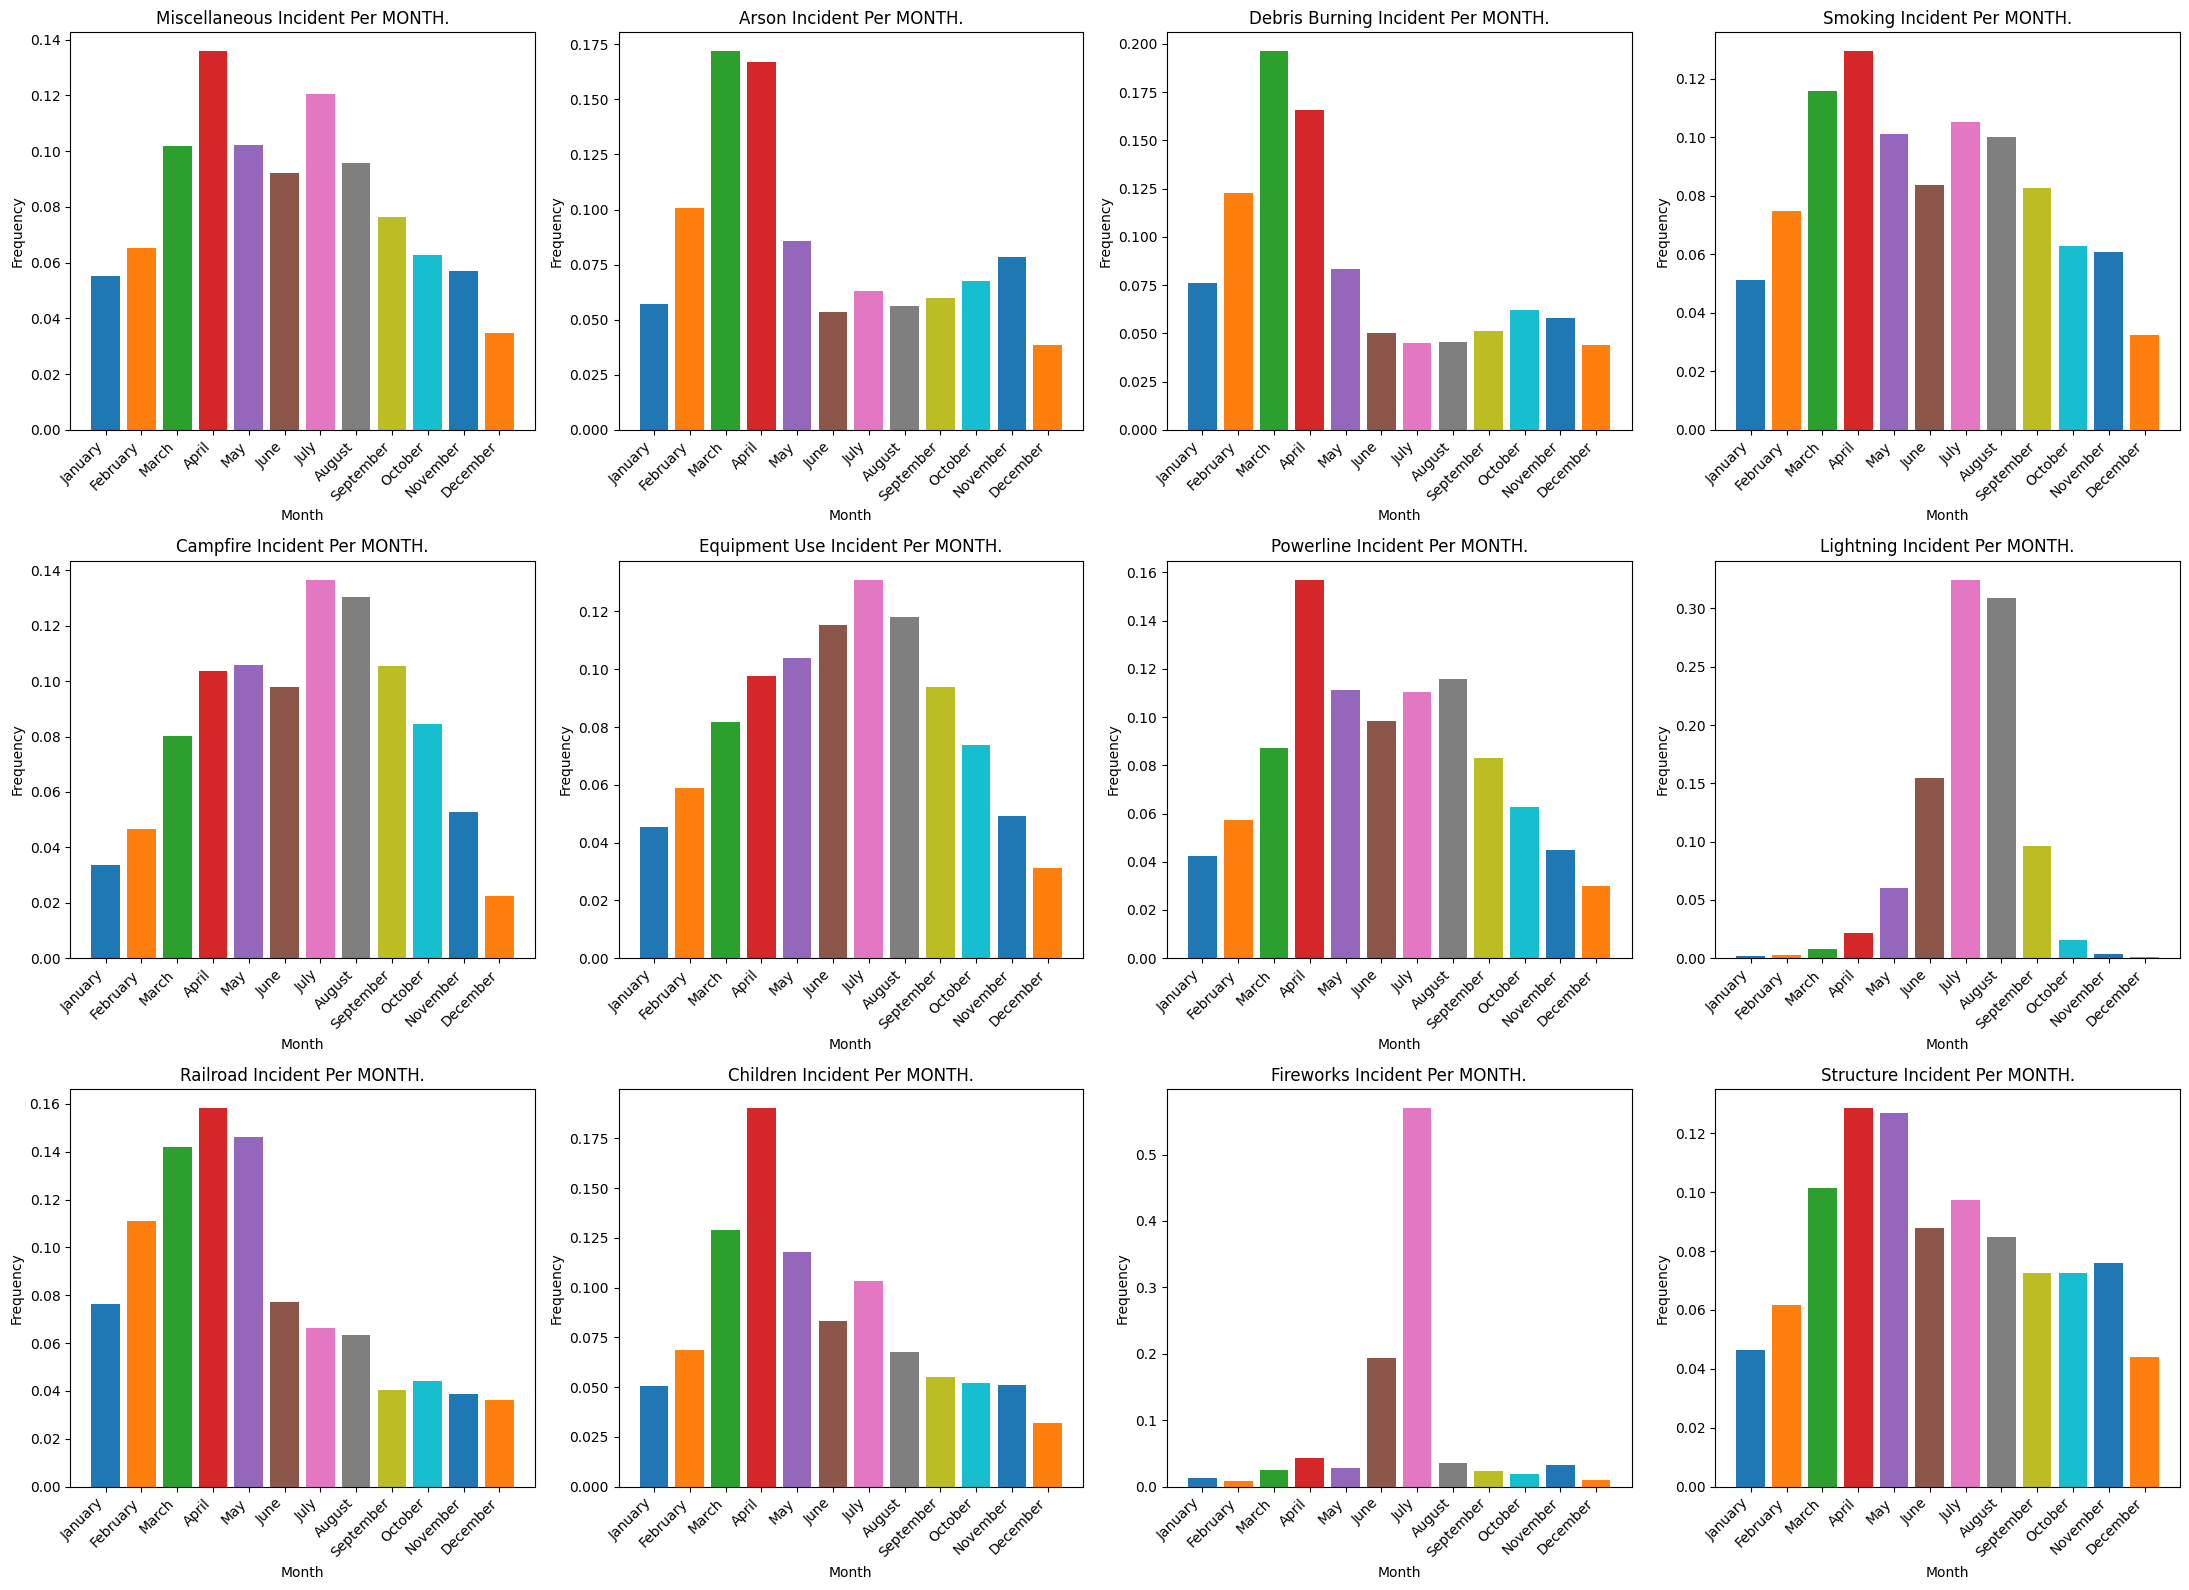

In [ ]:
# correlation between month and fire type
fig, ax = plt.subplots(3, 4, figsize=(22, 16))
for i, cause in enumerate(vis_df["STAT_CAUSE_DESCR"].unique()):
  row = i//4
  col = i%4
  temp_df = vis_df[vis_df["STAT_CAUSE_DESCR"] == cause]
  our_data = temp_df["MONTH"].value_counts()
  my_dic = dict(our_data/sum(our_data))

  for month in months:
    ax[row, col].bar(month, my_dic[month])

  ax[row, col].set_title(cause + " Incident Per MONTH.")
  ax[row, col].set_xlabel("Month")
  ax[row, col].set_xticklabels(months, rotation=45, ha='right')
  ax[row, col].set_ylabel("Frequency")

fig.tight_layout()
plt.show()

We can see that 85% of the lightning causes occur in 4 sequent months.

We can see that 75% of Fireworks occur on June/July which is the annual holidays, especially 4th of July - Independence day.

We can see a lot of other features in the graphs.

As a conclusion, using Month and human cause or natural cause could really benefit us in the predicting model.

Let see the number of all kinds of cuase on july the fourth

In [ ]:
new_df = df.drop(columns=["FOD_ID", "NWCG_REPORTING_UNIT_ID", "NWCG_REPORTING_UNIT_NAME",
             "SOURCE_REPORTING_UNIT", "SOURCE_REPORTING_UNIT_NAME", "LOCAL_FIRE_REPORT_ID", "LOCAL_INCIDENT_ID",
             "FIRE_CODE", "FIRE_NAME", "ICS_209_INCIDENT_NUMBER", "ICS_209_NAME", "MTBS_ID", "MTBS_FIRE_NAME",
             "COMPLEX_NAME", "OWNER_CODE", "COUNTY", "FIPS_CODE", "FIPS_NAME", "Shape", "FPA_ID"])
new_df['DATE'] = pd.to_datetime(new_df['DISCOVERY_DATE'] - pd.Timestamp(0).to_julian_date(), unit='D')
new_df['MONTH'] = pd.DatetimeIndex(new_df['DATE']).month
new_df['DAY_OF_WEEK'] = pd.DatetimeIndex(new_df['DATE']).dayofweek
new_df['CONT_DATE'] = pd.to_datetime(new_df['CONT_DATE'] - pd.Timestamp(0).to_julian_date(), unit='D')
new_df['CONT_MONTH'] = pd.DatetimeIndex(new_df['CONT_DATE']).month
new_df['CONT_DAY_OF_WEEK'] = pd.DatetimeIndex(new_df['CONT_DATE']).dayofweek
new_df["BURNING_DURATION_PER_DAY"] = (new_df["CONT_DATE"] - new_df["DATE"]).dt.days

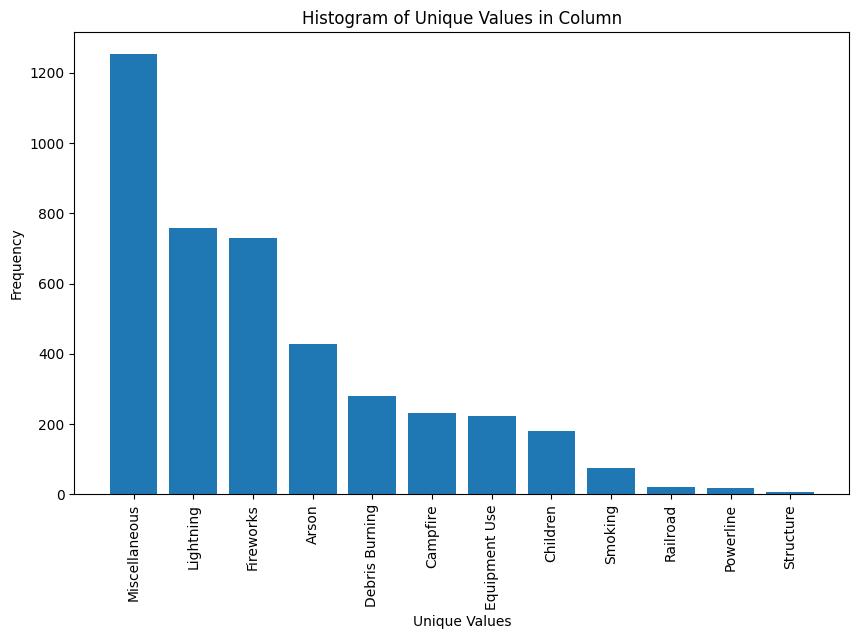

In [ ]:
# get july fouth data
july_4th_data = new_df[(new_df['DATE'].dt.month == 7) & (new_df['DATE'].dt.day == 4)]
# print distribution of july fourth data
value_counts = july_4th_data['STAT_CAUSE_DESCR'].value_counts()

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.bar(value_counts.index, value_counts.values)
plt.xlabel('Unique Values')
plt.ylabel('Frequency')
plt.title('Histogram of Unique Values in Column')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

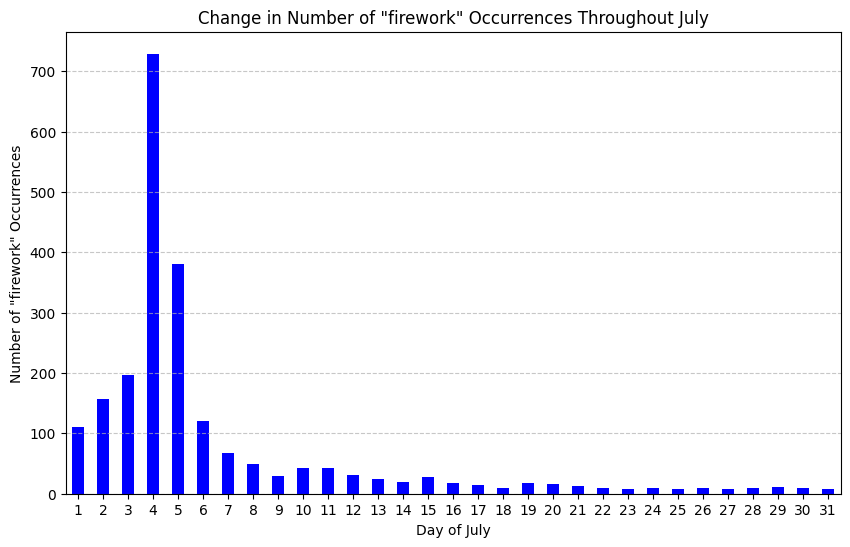

In [ ]:
# Filter the data for the month of July
july_data = new_df[new_df['DATE'].dt.month == 7]

# Filter the data for rows where the 'cause' column is 'firework'
firework_data = july_data[july_data['STAT_CAUSE_DESCR'] == 'Fireworks']

# Group by date and count the occurrences of 'firework'
firework_counts = firework_data.groupby(firework_data['DATE'].dt.day).size()
# Plot the change in the number of 'firework' occurrences throughout July
plt.figure(figsize=(10, 6))
firework_counts.plot(kind='bar', color='blue')
plt.xlabel('Day of July')
plt.ylabel('Number of "firework" Occurrences')
plt.title('Change in Number of "firework" Occurrences Throughout July')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


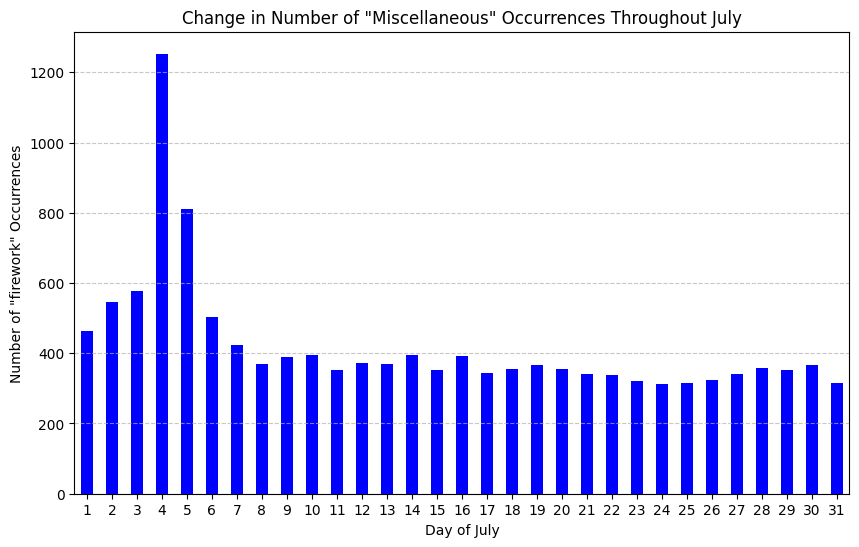

In [ ]:
# Filter the data for the month of July
july_data = new_df[new_df['DATE'].dt.month == 7]

# Filter the data for rows where the 'cause' column is 'firework'
firework_data = july_data[july_data['STAT_CAUSE_DESCR'] == 'Miscellaneous']

# Group by date and count the occurrences of 'firework'
firework_counts = firework_data.groupby(firework_data['DATE'].dt.day).size()
# Plot the change in the number of 'firework' occurrences throughout July
plt.figure(figsize=(10, 6))
firework_counts.plot(kind='bar', color='blue')
plt.xlabel('Day of July')
plt.ylabel('Number of "firework" Occurrences')
plt.title('Change in Number of "Miscellaneous" Occurrences Throughout July')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

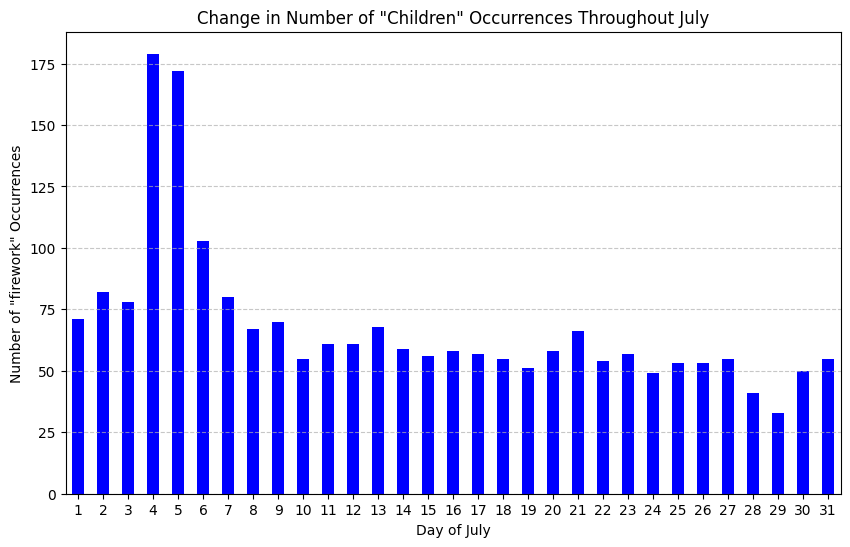

In [ ]:
# Filter the data for the month of July
july_data = new_df[new_df['DATE'].dt.month == 7]

# Filter the data for rows where the 'cause' column is 'firework'
firework_data = july_data[july_data['STAT_CAUSE_DESCR'] == 'Children']

# Group by date and count the occurrences of 'firework'
firework_counts = firework_data.groupby(firework_data['DATE'].dt.day).size()
# Plot the change in the number of 'firework' occurrences throughout July
plt.figure(figsize=(10, 6))
firework_counts.plot(kind='bar', color='blue')
plt.xlabel('Day of July')
plt.ylabel('Number of "firework" Occurrences')
plt.title('Change in Number of "Children" Occurrences Throughout July')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

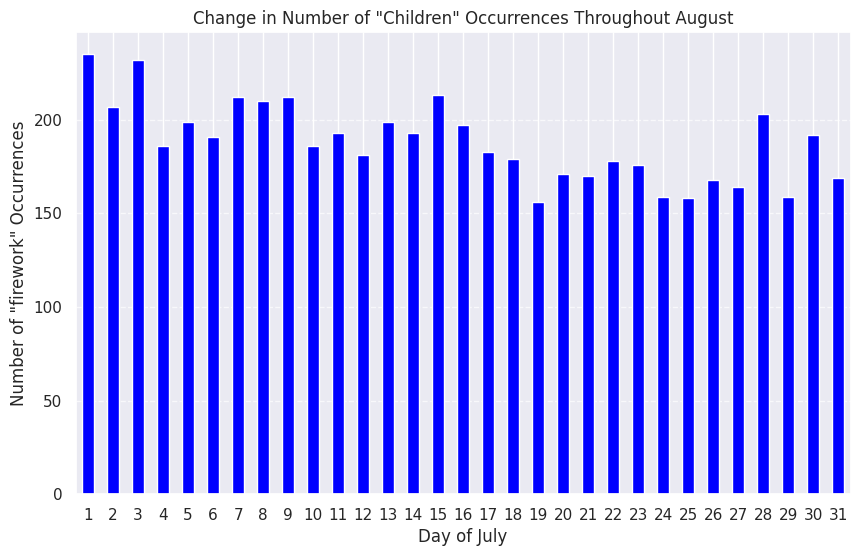

In [ ]:
# Filter the data for the month of July
july_data = new_df[new_df['DATE'].dt.month == 7]

# Filter the data for rows where the 'cause' column is 'firework'
firework_data = july_data[july_data['STAT_CAUSE_DESCR'] == 'Powerline']

# Group by date and count the occurrences of 'firework'
firework_counts = firework_data.groupby(firework_data['DATE'].dt.day).size()
# Plot the change in the number of 'firework' occurrences throughout July
plt.figure(figsize=(10, 6))
firework_counts.plot(kind='bar', color='blue')
plt.xlabel('Day of July')
plt.ylabel('Number of "firework" Occurrences')
plt.title('Change in Number of "Children" Occurrences Throughout August')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
target_classes = df['STAT_CAUSE_DESCR'].unique()

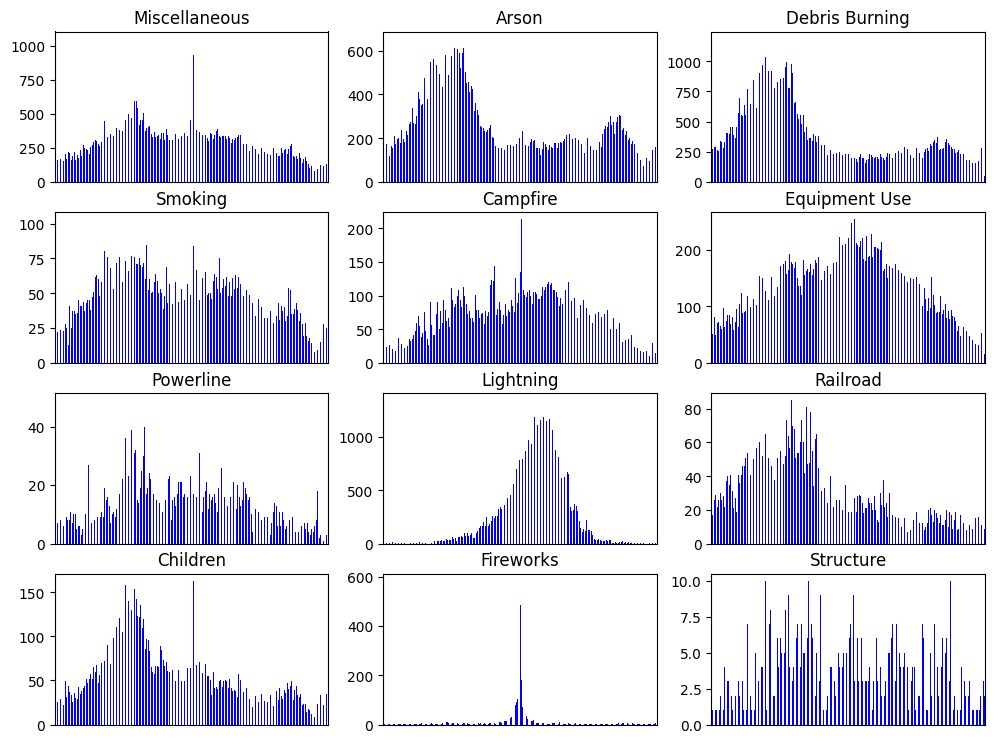

In [ ]:
# Create a figure and axes for the subplots
fig, axes = plt.subplots(4, 3, figsize=(12, 9))

# Flatten the axes array for easier iteration
axes = axes.flatten()

for i, target_class in enumerate(target_classes):
  target_class_df = df[df['STAT_CAUSE_DESCR'] == target_class]
  target_class_counts = target_class_df.groupby(df['DISCOVERY_DOY']).size()
  target_class_counts.plot(kind='bar', color='blue', ax=axes[i])
  axes[i].set_title(target_class)
  axes[i].set_xticks([])
  axes[i].set_xlabel('')


plt.show()


What if we combine the month and geospacial data?

Now let's look at the fire year's relation to distribution of fires and to overall fires

# Catagorical data

## Helper functions

In [ ]:
def print_stats_of_feature(df, feature_name):
  # number of rows that's not Nan
  number_of_null = df[feature_name].isnull().sum()
  num_of_values = len(df[~df[feature_name].isnull()])
  num_of_unique_values = len(df[feature_name].unique())
  value_counts = df[feature_name].value_counts(dropna=True)
  most_frequent_value = value_counts.idxmax()
  most_frequent_value_count = value_counts.max()
  print(f"There are {number_of_null} rows in {feature_name} that is null")
  print(f"There are {num_of_values} rows where {feature_name} is not Nan")
  print(f"{number_of_null/(num_of_values+number_of_null) * 100} percent of this column is null")
  print(f"There are {num_of_unique_values} unique {feature_name}")
  print(f"The most frequent {feature_name}  are {most_frequent_value}")
  print(f"The most frequent {feature_name} have {most_frequent_value_count} occurrence")


  # if there are more than 100 unique values, it's not possible to check if there are fuzzy/spelling errors manually
  if num_of_unique_values > 100:
    print("there are more than 100 unique values, it's not possible to check if there are fuzzy/spelling errors manually")
  else:
    print("The feature have less than 100 unique values, here are all it's unique values:")
    print(df[feature_name].unique())

In [ ]:
# list of catagorical features: For now we will not consider the one with nulls,
# and if the number of unique values are close to the number of rows, we don't consider it as catagorical data.
# there are in total 9
catagorical_features = ['FIRE_SIZE_CLASS',
                        'SOURCE_REPORTING_UNIT_NAME',
                        'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID', 'NWCG_REPORTING_UNIT_NAME',
                        'OWNER_CODE', 'OWNER_DESCR',
                        'SOURCE_SYSTEM', 'SOURCE_SYSTEM_TYPE']

In [ ]:
percentage_of_each_label = df[target_column].value_counts(normalize=True)
percentage_of_each_label

STAT_CAUSE_DESCR
Debris Burning    0.250381
Miscellaneous     0.189652
Arson             0.163283
Lightning         0.162851
Equipment Use     0.086491
Campfire          0.044393
Children          0.035620
Smoking           0.030749
Railroad          0.019343
Powerline         0.008283
Fireworks         0.006764
Structure         0.002191
Name: proportion, dtype: float64

In [ ]:
# in this method, we can only explore catagorical features with less values
def plot_crosstab_heatmap(df, feature_name):
  cross_Vals = pd.crosstab(df[feature_name], df['STAT_CAUSE_DESCR'],  normalize='index')
  sns.heatmap(cross_Vals, annot=True, annot_kws={"fontsize":6})
  plt.title(f'heatmap for values x classes for {feature_name}')
  plt.show()

def plot_crosstab_heatmap_vs_original(df, feature_name):
  cross_Vals = pd.crosstab(df[feature_name], df['STAT_CAUSE_DESCR'],  normalize='index')
  cross_Vals = cross_Vals.div(percentage_of_each_label, axis=1)
  sns.heatmap(cross_Vals, annot=True, annot_kws={"fontsize":6})
  plt.title(f'heatmap for values x classes for {feature_name}')
  plt.show()

## NWCG_REPORTING_AGENCY, OWNER_DESCR, FIRE_SIZE_CLASS, SOURCE_SYSTEM

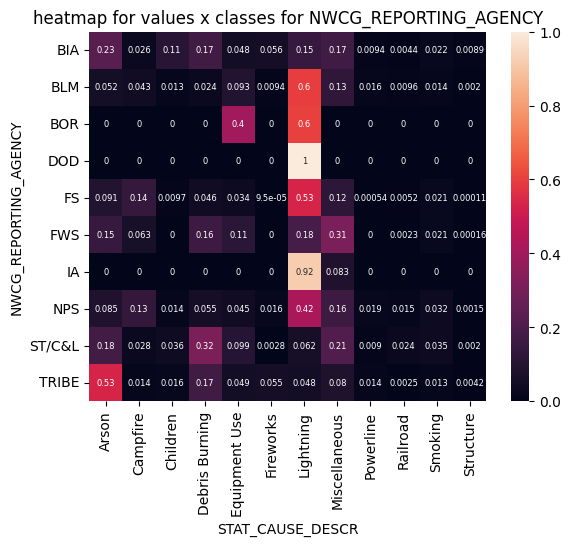

In [ ]:
plot_crosstab_heatmap(df, 'NWCG_REPORTING_AGENCY')

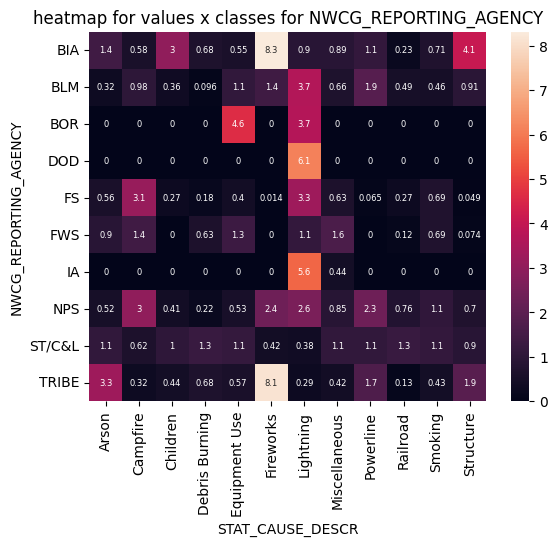

In [ ]:
plot_crosstab_heatmap_vs_original(df, 'NWCG_REPORTING_AGENCY')

I don't know if this is a valid action, but as we can see,

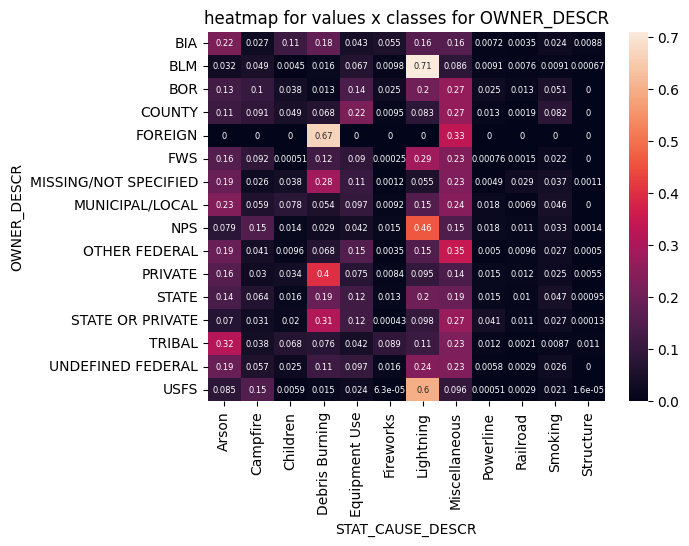

In [ ]:
plot_crosstab_heatmap(df, 'OWNER_DESCR')

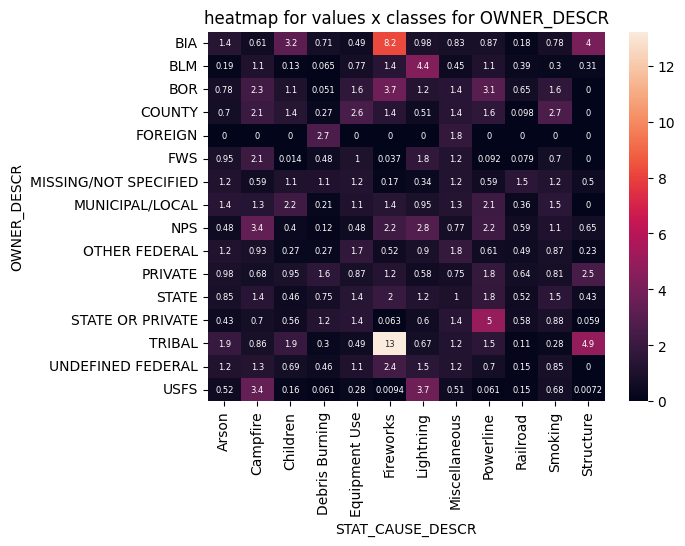

In [ ]:
plot_crosstab_heatmap_vs_original(df, 'OWNER_DESCR')

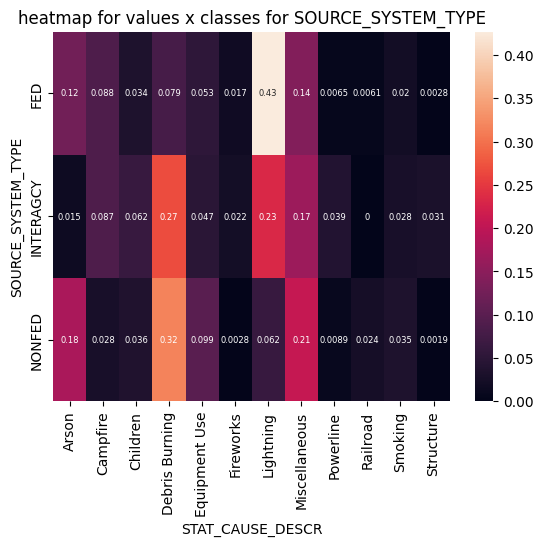

In [ ]:
plot_crosstab_heatmap(df, 'SOURCE_SYSTEM_TYPE')

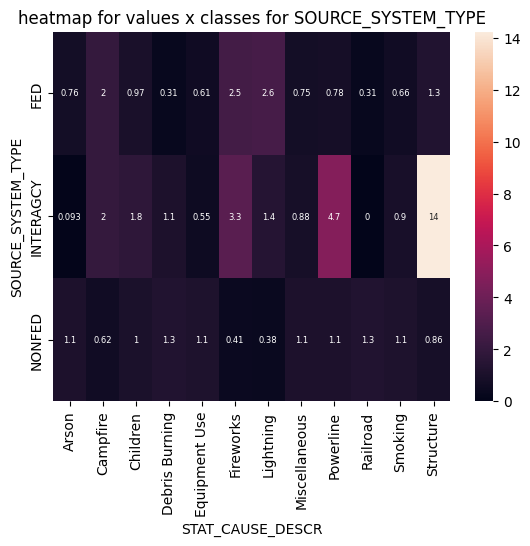

In [ ]:
plot_crosstab_heatmap_vs_original(df, 'SOURCE_SYSTEM_TYPE')

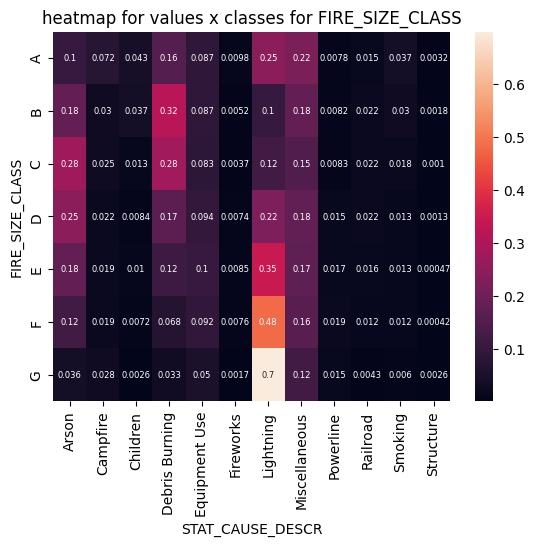

In [ ]:
plot_crosstab_heatmap(df, 'FIRE_SIZE_CLASS')

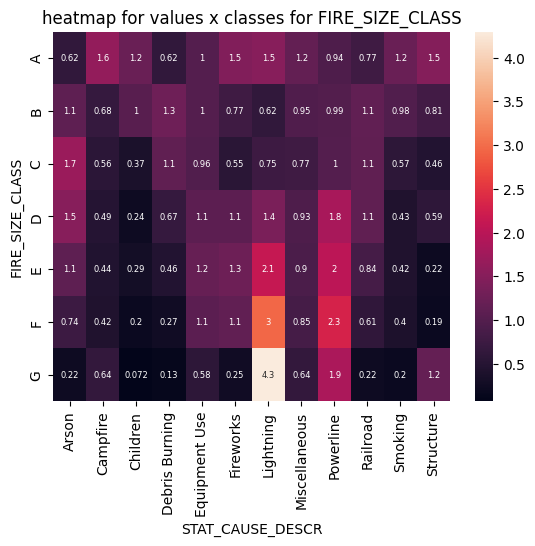

In [ ]:
plot_crosstab_heatmap_vs_original(df, 'FIRE_SIZE_CLASS')

Same as in the Null value section, we still need to normalize the results. Because this distribution we see now is "absolute", in the original dataset, some target labels are just more than other labels. So we want to see how much does adding the constraint "feature_i = value_k" will affect the distribution of the features.

# FIRE_SIZE

Area of Fires by Cause:

In [ ]:
cause_dict = {
    1:{'man_made':0, 'label':'Lightning'},
    2:{'man_made':1, 'label':'Equipment Use'},
    3:{'man_made':1, 'label':'Smoking'},
    4:{'man_made':1, 'label':'Campfire'},
    5:{'man_made':1, 'label':'Debris Burning'},
    6:{'man_made':1, 'label':'Railroad'},
    7:{'man_made':1, 'label':'Arson'},
    8:{'man_made':1, 'label':'Children'},
    9:{'man_made':2, 'label':'Miscellaneous'},
    10:{'man_made':1, 'label':'Fireworks'},
    11:{'man_made':1, 'label':'Powerline'},
    12:{'man_made':1, 'label':'Structure'},
    13:{'man_made':2, 'label':'Missing/Undefined'},
}
fires_by_cause = vis_df.groupby(by = ['STAT_CAUSE_CODE']).agg({'OBJECTID':'count', 'FIRE_SIZE':['sum', 'max', 'mean']})
fig = px.bar(x = [cause_dict[i]['label'] for i in fires_by_cause.index], y = fires_by_cause['FIRE_SIZE']['sum']).update_xaxes(categoryorder="total ascending")
fig.update_layout(title = 'Area of Fires by Cause',
                 xaxis_title = 'Cause of Fire',
                 yaxis_title = 'Burned Area (by acres)',
                 title_x = 0.5)
fig.show()

Text(0.5, 1.0, 'Median of Area Size by Fire Cause')

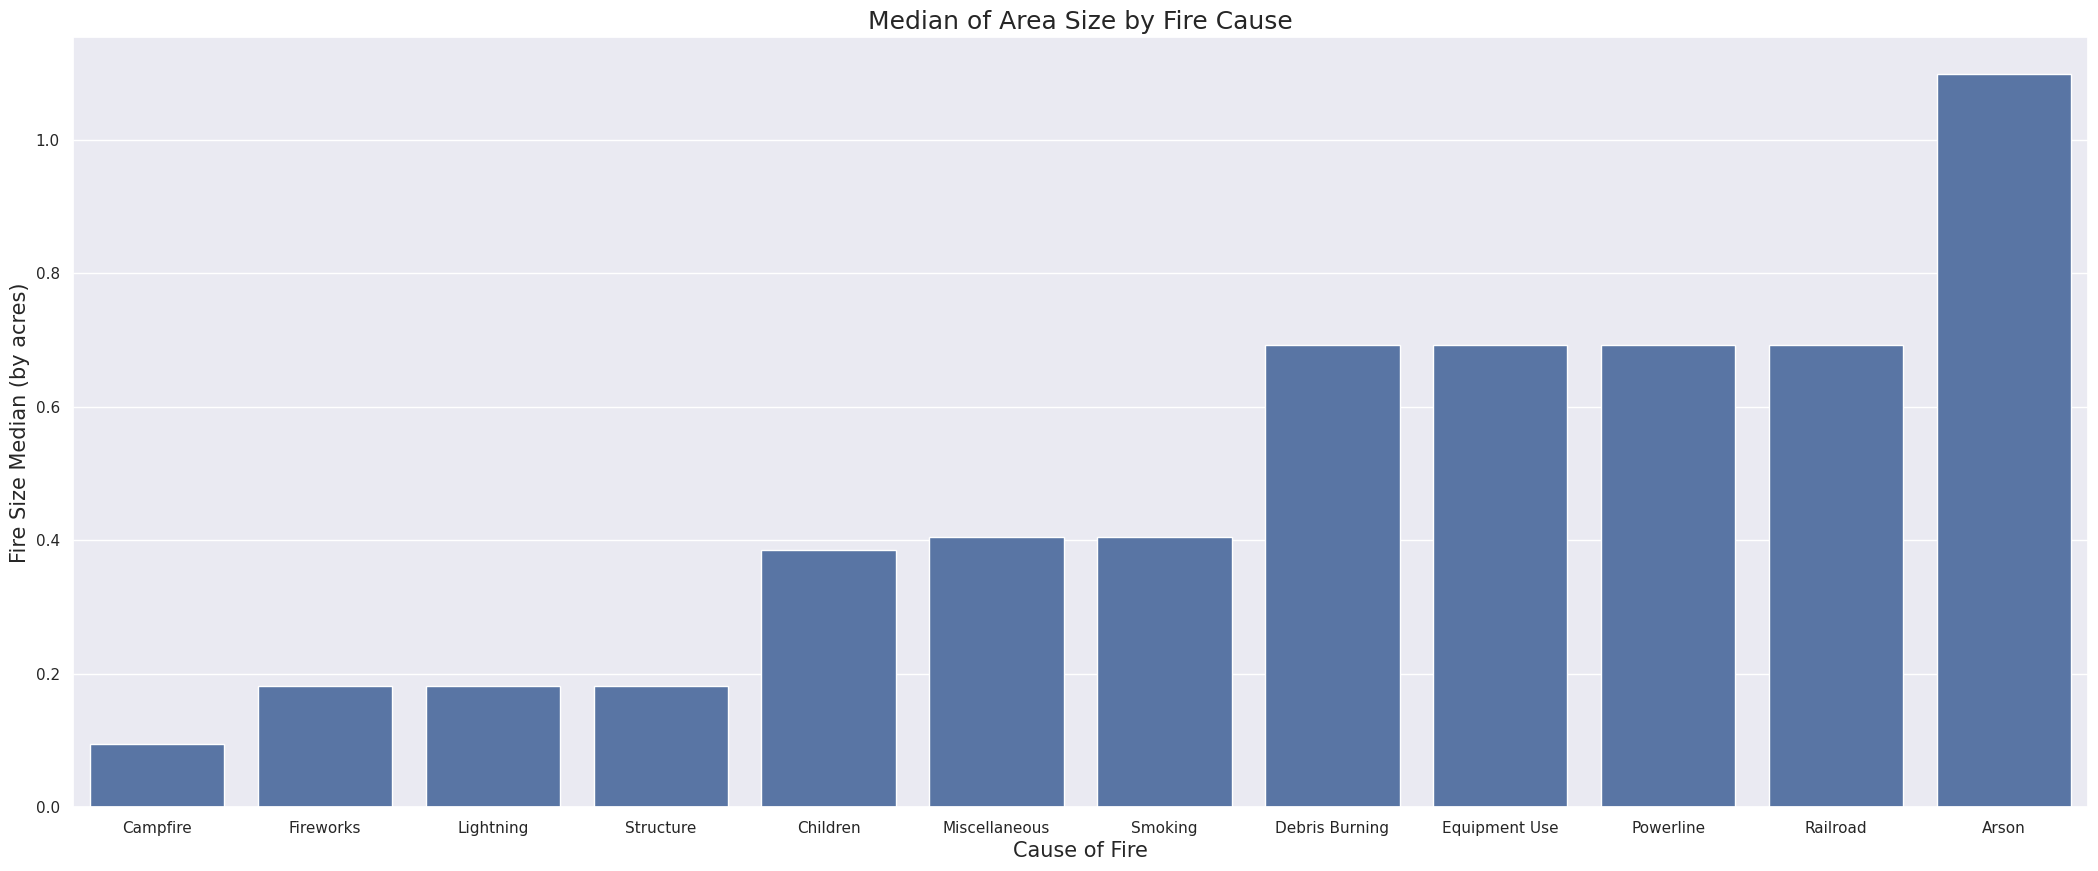

In [ ]:
temp_df = vis_df.groupby(["STAT_CAUSE_DESCR"])["FIRE_SIZE"].median()
sns.set(rc={'figure.figsize':(26,10)})
ax = sns.barplot(x=temp_df.index, y=temp_df, order=temp_df.sort_values().index)
ax.tick_params(axis='x')
ax.set_xlabel("Cause of Fire", fontsize=15)
ax.set_ylabel("Fire Size Median (by acres)", fontsize=15)
ax.set_title("Median of Area Size by Fire Cause", fontsize=18)

# FIRE_SIZE_CLASS

In [ ]:
# Distribution of Fires Classes:
fire_by_class = vis_df.groupby(by = 'FIRE_SIZE_CLASS').agg({'OBJECTID':'count', 'FIRE_SIZE':['sum', 'max', 'mean']})
fig = px.bar(x = fire_by_class['OBJECTID'].index,
       y = fire_by_class['OBJECTID']['count'],
       title = 'Distribution of Fire Classes')
fig.update_layout(title_x = 0.5,
                  xaxis_title="Fire Size Class",
                  yaxis_title = 'Count of Fires')
fig.show()

In [ ]:
# Total Area Burned by Fire Classes:
fig = px.bar(x = fire_by_class['OBJECTID'].index,
       y = fire_by_class['FIRE_SIZE']['sum'],
       title = 'Total Area Burned by Fire Classes')
fig.update_layout(title_x = 0.5,
                  xaxis_title="Fire Size Class",
                  yaxis_title = 'Area Burned (By Acres)')
fig.show()